In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import tensorflow as tf


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset_1_path='/content/drive/MyDrive/Colab Notebooks/sentiment_analysis/dataset_1.csv'
dataset_2_path='/content/drive/MyDrive/Colab Notebooks/sentiment_analysis/dataset_2.csv'

In [ ]:
df_1=pd.read_csv(dataset_1_path)


In [ ]:
df_version1=df_1.filter(['asins','reviews.text','reviews.rating', 'reviews.numHelpful'])

In [ ]:
df_version1.count()

In [ ]:
df_2=pd.read_csv(dataset_2_path)

In [ ]:
df_version2=df_2.filter(['asins','reviews.text','reviews.rating','review.numHelpful'])

In [ ]:
df_version2.count()

asins             28332
reviews.text      28332
reviews.rating    28332
dtype: int64

In [ ]:
df_version1['asins'].value_counts()

B01AHB9CN2    797
B010CEHQTG    650
B06XB29FPF    590
B018Y22C2Y    561
B018Y225IA    467
B018Y22BI4    371
B01BH83OOM    225
B018Y23MNM    217
B01J24C0TI    195
B017JG41PC    159
B0189XYY0Q    106
B018Y224PY    101
B00ZV9PXP2     96
B00IOY8XWQ     82
B01AHBDCKQ     70
B01ACEKAJY     58
B01AHB9C1E     53
B01AHBBG04     51
B01AHB9CYG     40
B00REQKWGA     39
B00VINDBJK     24
B00QFQRELG     22
B00IOYAM4I     22
B01N32NCPM      4
Name: asins, dtype: int64

In [ ]:
df_version2['asins'].value_counts()

B00QWO9P0O,B00LH3DMUO               8343
B00QWO9P0O,B01IB83NZG,B00MNV8E0C    3728
B018T075DC                          2443
B018SZT3BK,B01AHB9CN2               2370
B018Y226XO                          1676
                                    ... 
B00VKTZFB4                             1
B00OP6SMCI                             1
B01J24C0TI                             1
B010RLCH2U                             1
B00QAVO43C                             1
Name: asins, Length: 65, dtype: int64

In [ ]:
df=df_version2.append(df_version1)

In [ ]:
df.describe()

,reviews.rating,reviews.numHelpful
count,33332.000000,5000.000000
mean,4.526461,0.312400
std,0.907859,3.111582
min,1.000000,0.000000
25%,4.000000,0.000000
50%,5.000000,0.000000
75%,5.000000,0.000000
max,5.000000,105.000000


In [ ]:
df.nunique(axis=1)

0       3
1       3
2       3
3       3
4       3
       ..
4995    4
4996    4
4997    4
4998    4
4999    4
Length: 33332, dtype: int64

In [ ]:
## final datraset is 'df'

In [ ]:
## data preprocessing in sentiment analysis

In [ ]:
##lets finds the null or NaN value in each column
import nltk
import spacy
import string
import re

In [ ]:
## convert to string
df['reviews.text']=df['reviews.text'].astype(str)

In [ ]:
#convert to lower case
df['review_lower']=df['reviews.text'].str.lower()

In [ ]:

## remove  punctuation and stopwords
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
PUNC_TO_REMOVE=string.punctuation

def remove_punctuation(text):
  return text.translate(str.maketrans('','',PUNC_TO_REMOVE))




In [ ]:
df['reviews.numHelpful']=df['reviews.numHelpful'].fillna(0)

In [ ]:
df.drop(['asins'],axis=1,inplace=True)

In [ ]:
## stopword using nltk
!pip3 install nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
STOPWORDS=set(stopwords.words('english'))

In [ ]:
def remove_stopword_and_punctuation(review):
  return ' '.join([word for word in review.split() if word not in STOPWORDS and word not in string.punctuation ])

In [ ]:
df['reviews_wo_punc_and_stopwords']=df['review_lower'].apply(lambda review: remove_stopword_and_punctuation(review))

In [ ]:
df['reviews_wo_punc_and_stopwords']=df['reviews_wo_punc_and_stopwords'].apply(lambda text: remove_punctuation(text))

In [ ]:

df.head()

,reviews.text,reviews.rating,reviews.numHelpful,review_lower,reviews_wo_punc_and_stopwords
0,I order 3 of them and one of the item is bad q...,3,0.0,i order 3 of them and one of the item is bad q...,order 3 one item bad quality missing backup sp...
1,Bulk is always the less expensive way to go fo...,4,0.0,bulk is always the less expensive way to go fo...,bulk always less expensive way go products like
2,Well they are not Duracell but for the price i...,5,0.0,well they are not duracell but for the price i...,well duracell price happy
3,Seem to work as well as name brand batteries a...,5,0.0,seem to work as well as name brand batteries a...,seem work well name brand batteries much bette...
4,These batteries are very long lasting the pric...,5,0.0,these batteries are very long lasting the pric...,batteries long lasting price great


In [ ]:
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
## stemming and Lemmatization
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
lemmatizer=WordNetLemmatizer()

In [ ]:
wordnet_map={
    'N':wordnet.NOUN,
    'V':wordnet.VERB,
    'A':wordnet.ADJ,
    'R':wordnet.ADV
}

def lemmatize_words(review):
  pos_tagged_text=nltk.pos_tag(review.split())
  return ' '.join([lemmatizer.lemmatize(word,wordnet_map.get(pos[0],wordnet.NOUN)) for word, pos in pos_tagged_text])


In [ ]:
df['lemmatize_text']=df['reviews_wo_punc_and_stopwords'].apply(lambda review : lemmatize_words(review))

In [ ]:
df.head()

,reviews.text,reviews.rating,reviews.numHelpful,review_lower,reviews_wo_punc_and_stopwords,lemmatize_text
0,I order 3 of them and one of the item is bad q...,3,0.0,i order 3 of them and one of the item is bad q...,order 3 one item bad quality missing backup sp...,order 3 one item bad quality miss backup sprin...
1,Bulk is always the less expensive way to go fo...,4,0.0,bulk is always the less expensive way to go fo...,bulk always less expensive way go products like,bulk always less expensive way go product like
2,Well they are not Duracell but for the price i...,5,0.0,well they are not duracell but for the price i...,well duracell price happy,well duracell price happy
3,Seem to work as well as name brand batteries a...,5,0.0,seem to work as well as name brand batteries a...,seem work well name brand batteries much bette...,seem work well name brand battery much better ...
4,These batteries are very long lasting the pric...,5,0.0,these batteries are very long lasting the pric...,batteries long lasting price great,battery long lasting price great


In [ ]:
## model defination
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer,one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, LSTM, Embedding, SpatialDropout1D,Flatten
from sklearn.model_selection import  train_test_split
from keras.utils.np_utils import to_categorical 

In [ ]:
## tokenization
def review_tokenization(review):
  return word_tokenize(review)

df['word_review_token']=df['lemmatize_text'].apply(lambda review: review_tokenization(review) )

In [ ]:
## lets remove number from reviews

import re
def remove_number(review):
  return ' '.join([ s for s in review.split() if not s.isdigit()])


In [ ]:
df['processed_review']=df['lemmatize_text'].apply(lambda review: remove_number(review))

In [ ]:
df.head()

,reviews.text,reviews.rating,reviews.numHelpful,review_lower,reviews_wo_punc_and_stopwords,lemmatize_text,word_review_token,processed_review
0,I order 3 of them and one of the item is bad q...,3,0.0,i order 3 of them and one of the item is bad q...,order 3 one item bad quality missing backup sp...,order 3 one item bad quality miss backup sprin...,"[order, 3, one, item, bad, quality, miss, back...",order one item bad quality miss backup spring ...
1,Bulk is always the less expensive way to go fo...,4,0.0,bulk is always the less expensive way to go fo...,bulk always less expensive way go products like,bulk always less expensive way go product like,"[bulk, always, less, expensive, way, go, produ...",bulk always less expensive way go product like
2,Well they are not Duracell but for the price i...,5,0.0,well they are not duracell but for the price i...,well duracell price happy,well duracell price happy,"[well, duracell, price, happy]",well duracell price happy
3,Seem to work as well as name brand batteries a...,5,0.0,seem to work as well as name brand batteries a...,seem work well name brand batteries much bette...,seem work well name brand battery much better ...,"[seem, work, well, name, brand, battery, much,...",seem work well name brand battery much better ...
4,These batteries are very long lasting the pric...,5,0.0,these batteries are very long lasting the pric...,batteries long lasting price great,battery long lasting price great,"[battery, long, lasting, price, great]",battery long lasting price great


In [ ]:
voc_size=20000
encoded_docs=[one_hot(d,voc_size) for d in df['processed_review']]

In [ ]:
encoded_docs[1]

[10863, 18445, 1959, 900, 3759, 2477, 6905, 2427]

In [ ]:
max_length=30
padded_reviews=pad_sequences(encoded_docs,maxlen=max_length,padding='pre')

In [ ]:
padded_reviews[1]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0, 10863, 18445,  1959,   900,  3759,
        2477,  6905,  2427], dtype=int32)

In [ ]:
lstm_units=500
model=Sequential()
model.add(Embedding(voc_size,30,input_length=max_length))
model.add(LSTM(lstm_units,dropout=0.2 ,recurrent_dropout=0.2))
model.add(Dense(6,activation='softmax'))
model.compile(tf.keras.optimizers.Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 30, 30)            600000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 500)               1062000   
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 3006      
Total params: 1,665,006
Trainable params: 1,665,006
Non-trainable params: 0
_________________________________________________________________


In [ ]:
Y_train=df['reviews.rating']
encoded_data=to_categorical(Y_train)


In [ ]:
model.fit(padded_reviews, encoded_data, batch_size=34, epochs=50, verbose=1, validation_split=0.1)

Epoch 1/50
883/883 [==============================] - 198s 219ms/step - loss: 0.8055 - accuracy: 0.7113 - val_loss: 0.7102 - val_accuracy: 0.6911
Epoch 2/50
883/883 [==============================] - 194s 220ms/step - loss: 0.6692 - accuracy: 0.7413 - val_loss: 0.5887 - val_accuracy: 0.7597
Epoch 3/50
883/883 [==============================] - 193s 218ms/step - loss: 0.5788 - accuracy: 0.7790 - val_loss: 0.5112 - val_accuracy: 0.7900
Epoch 4/50
883/883 [==============================] - 194s 220ms/step - loss: 0.5206 - accuracy: 0.8062 - val_loss: 0.4204 - val_accuracy: 0.8419
Epoch 5/50
883/883 [==============================] - 192s 218ms/step - loss: 0.4711 - accuracy: 0.8286 - val_loss: 0.3794 - val_accuracy: 0.8653
Epoch 6/50
883/883 [==============================] - 193s 218ms/step - loss: 0.4294 - accuracy: 0.8452 - val_loss: 0.3314 - val_accuracy: 0.8875
Epoch 7/50
883/883 [==============================] - 194s 220ms/step - loss: 0.3945 - accuracy: 0.8588 - val_loss: 0.3045 -

In [ ]:
model.history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

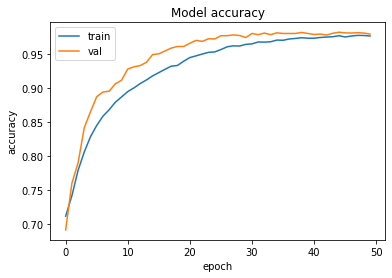

In [ ]:
import matplotlib.pyplot as plt
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','val'],loc='upper left')
plt.show()

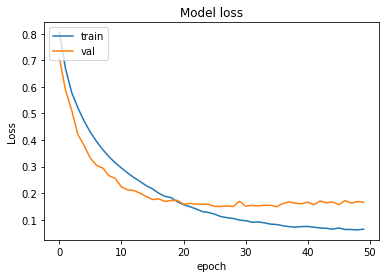

In [ ]:
import matplotlib.pyplot as plt
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train','val'],loc='upper left')
plt.show()

In [ ]:
model.save('LSTM_Model_Sentiment_Analysis.h5')

In [ ]:
encoded_docs[0]

[9797,
 11866,
 7961,
 10973,
 2128,
 16196,
 11323,
 8365,
 3454,
 13726,
 6690,
 2249,
 16755,
 17097]

In [ ]:
p1=model.predict(encoded_docs[0])

In [ ]:
p1

array([[3.3138448e-04, 5.5655128e-01, 1.4504135e-03, 7.7505433e-04,
        2.7080676e-02, 4.1381121e-01],
       [3.8547223e-05, 4.3338817e-03, 5.0842582e-04, 3.0633169e-03,
        1.2841122e-01, 8.6364466e-01],
       [5.4535636e-08, 9.8102069e-01, 1.6507971e-04, 5.7240413e-03,
        6.6643455e-03, 6.4258543e-03],
       [1.9052071e-09, 1.1642287e-01, 1.4544462e-04, 8.1831021e-03,
        8.7507087e-01, 1.7763540e-04],
       [1.5393439e-09, 3.9444286e-01, 2.9249486e-06, 6.7641325e-02,
        2.6936512e-02, 5.1097637e-01],
       [3.5401786e-07, 5.3665864e-01, 1.4765580e-03, 1.1953892e-02,
        4.4964826e-01, 2.6225735e-04],
       [9.0293995e-10, 1.7104090e-04, 1.9438691e-04, 1.3283815e-04,
        9.9945658e-01, 4.5121782e-05],
       [5.8666613e-11, 2.0182351e-07, 7.6358534e-05, 6.2911123e-01,
        4.0691555e-03, 3.6674300e-01],
       [5.0584856e-09, 8.1478857e-02, 1.2349563e-04, 2.3638414e-02,
        6.5317973e-03, 8.8822740e-01],
       [1.3792227e-10, 2.8838076e-07,

In [ ]:
## The output p1 is of two dimension array
## It represents the vector of each word  with respect to the class. For eg: [0,1,2,3,4,5] 
## we can find the  class of review by choosing the max out of the individual word vector and averaging the final 1D array 